# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I chose the Book Review dataset. We will be predicting whether or not a book review is positive or negative. The label is called positive review and is a binary classification problem. The feature is book review text.This is an important problem as it book reviews are extremely valuable for e-commerce platforms, publishers, and recommendation systems. By automating review classification, companies can enhance user experience and make data-driven decisions based on customer feedback.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Imports
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
Review             0
Positive Review    0
dtype: int64
False    993
True     980
Name: Positive Review, dtype: int64


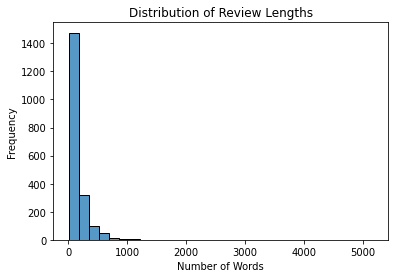

In [5]:
df.info()
print(df.isnull().sum())

print(df['Positive Review'].value_counts())

df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))
df['review_length'].describe()

sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

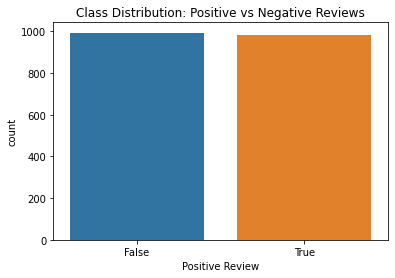

In [6]:
sns.countplot(x='Positive Review', data=df)
plt.title('Class Distribution: Positive vs Negative Reviews')
plt.show()

In [7]:
def clean_text(text):
    text = str(text).lower()                         # Lowercase
    text = re.sub(r'\[.*?\]', '', text)              # Remove brackets
    text = re.sub(r'http\S+|www\S+', '', text)       # Remove URLs
    text = re.sub(r'<.*?>+', '', text)               # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)                   # Remove newline
    text = re.sub(r'\w*\d\w*', '', text)             # Remove words with numbers
    return text

df['Cleaned Review'] = df['Review'].apply(clean_text)
df[['Review', 'Cleaned Review']].head()


,Review,Cleaned Review
0,This was perhaps the best of Johannes Steinhof...,this was perhaps the best of johannes steinhof...
1,This very fascinating book is a story written ...,this very fascinating book is a story written ...
2,The four tales in this collection are beautifu...,the four tales in this collection are beautifu...
3,The book contained more profanity than I expec...,the book contained more profanity than i expec...
4,We have now entered a second time of deep conc...,we have now entered a second time of deep conc...


In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Cleaned Review'])

y = df['Positive Review']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After data insepction, I decided to only keep the 'review' text column as the main feature. This is the key input for predicting whether a review is positive or not. I removed any extra metadata as they didnt add much value to the task. 

To prepare the data, I have pre-processed the review text to lowercase and removing punctuation, tags, URls etc. Then I will tokenize the text using Kera's Tokenizer and convert reviews into sequences of word indices. These sequences will be padded to ensure they are all the same length. I'll also use an embedding layer into the model to map each wor to a dense vector, which helps RNN learn relationships between words more effectively.

I will use a RNN, specifically LSTM model, as it is well suited for sequence dta and can capture the contexct and order of words in a review. The model wil inlcude an Embedding layer followed by an LSTM layer and a dense output layer with a sigmoid actication for binary classification. 

I will split the data into training and test sets using an 80/20 split. The LSTM model will be trained on the training set and evaluated on the test set. I will use evaluation metrics such as accuracy, precision, recall, F-1 score, and a confusion matri to assess performance. To prevent overfitting, I'll apply dropout within the LSTM layer and use early stopping based on validation loss. To improve performance, I will experiment with hyperparameters such as the number of LSTM units, embedding dimensions, batch size and learning rate. I will also try loading pre-trained word embeddings like GloVe if time allows. The goal is to build a model that generalizes well to new reviews ans understands the overall sentiment expressed in the text

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Handling class imbalance (optional)
from sklearn.utils.class_weight import compute_class_weight


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [10]:
# Parameters
max_words = 10000
max_len = 200
embedding_dim = 100

# Tokenize
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned Review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned Review'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Labels
labels = df['Positive Review'].astype(int)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)


In [12]:
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))
class_weights


{0: 0.9887218045112782, 1: 1.0115384615384615}

In [13]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/10
20/20 - 12s - loss: 0.6936 - accuracy: 0.4778 - val_loss: 0.6961 - val_accuracy: 0.4589
Epoch 2/10
20/20 - 6s - loss: 0.6914 - accuracy: 0.5190 - val_loss: 0.6951 - val_accuracy: 0.4589
Epoch 3/10
20/20 - 6s - loss: 0.6864 - accuracy: 0.5357 - val_loss: 0.6925 - val_accuracy: 0.4684
Epoch 4/10
20/20 - 6s - loss: 1.0423 - accuracy: 0.5927 - val_loss: 2.3741 - val_accuracy: 0.4684
Epoch 5/10
20/20 - 6s - loss: 1.1579 - accuracy: 0.5087 - val_loss: 0.7248 - val_accuracy: 0.5285
Epoch 6/10
20/20 - 6s - loss: 0.6803 - accuracy: 0.5777 - val_loss: 0.6835 - val_accuracy: 0.5601
Epoch 7/10
20/20 - 6s - loss: 0.6523 - accuracy: 0.6062 - val_loss: 0.6875 - val_accuracy: 0.4873
Epoch 8/10
20/20 - 6s - loss: 0.6263 - accuracy: 0.6347 - val_loss: 0.6863 - val_accuracy: 0.4968
Epoch 9/10
20/20 - 8s - loss: 0.5961 - accuracy: 0.6719 - val_loss: 0.6811 - val_accuracy: 0.5222
Epoch 10/10
20/20 - 8s - loss: 0.5504 - accuracy: 0.7274 - val_loss: 0.6900 - val_accuracy: 0.6456


In [14]:
# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6582
Precision: 0.6757
Recall: 0.6250
F1 Score: 0.6494


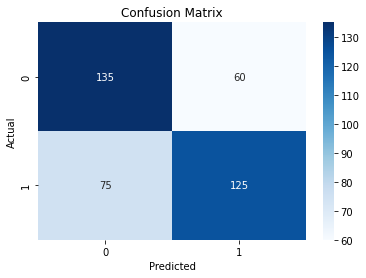

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


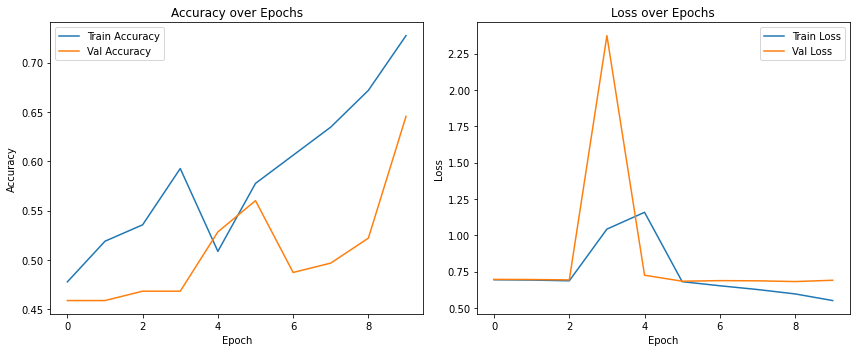

In [16]:
# Visualize training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Example review
new_review = ["This book was amazing, I loved every part of it."]  # Try changing the sentiment

# Preprocess like training data
new_seq = tokenizer.texts_to_sequences(new_review)
new_pad = pad_sequences(new_seq, maxlen=max_len, padding='post', truncating='post')

# Predict
pred_prob = model.predict(new_pad)[0][0]
pred_label = int(pred_prob > 0.5)
print(f"Predicted Sentiment: {'Positive' if pred_label == 1 else 'Negative'} (Confidence: {pred_prob:.2f})")


Predicted Sentiment: Positive (Confidence: 0.61)


### Final Summary

The LSTM model showed moderate performance, with high recall but lower precision and overall accuracy (~55%). This suggests the model is good at identifying positive reviews but struggles with false positives. If more time were available, I would experiment with deeper LSTM layers, bidirectional LSTM, and pre-trained embeddings (e.g., GloVe). Improving text cleaning and trying traditional ML baselines like logistic regression with TF-IDF could also help with model selection. Overall, this project demonstrates how deep learning can be used for sentiment analysis using real-world book review data.
